# PyTorch for CIFAR10
We test ResNet classifier.
First init some basic environment.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# resnet20 classifier

In [2]:
import torch.optim as optim
import torch.nn as nn
import time
from cifar10_solver import CIFAR10Solver, plot_history
from classifiers.resnet import resnet20

resnet = resnet20()
print(resnet)

_ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (layer1): Sequential(
    (0): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
      )
      (conv_bn2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu_out): ReLU(inplace)
    )
    (1): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affi

# train reset20


In [3]:
%%time
opt = optim.SGD(resnet.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4, nesterov=False)
loss_fn = nn.CrossEntropyLoss()
solver = CIFAR10Solver(resnet, opt, loss_fn)
def reduce_lr(epoch):
    if epoch <= 91:
        return 1
    elif epoch > 91 and epoch <= 137:
        return 0.1
    else:
        return 0.01
lr_scheduler = optim.lr_scheduler.LambdaLR(opt, lr_lambda=[reduce_lr])
# lr_scheduler = None
history = solver.train(epochs=182, lr_scheduler=lr_scheduler, train_batch_size=128)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
train on device: cuda:0
start training. epoch steps: 352
Epoch: 1/182, lr:1.00e-01
[##################################################] 100.00% loss:1.7 acc:36.60% val_loss:1.5 val_acc:44.10%
Epoch: 2/182, lr:1.00e-01
[##################################################] 100.00% loss:1.2 acc:55.10% val_loss:1.1 val_acc:60.34%
Epoch: 3/182, lr:1.00e-01
[##################################################] 100.00% loss:0.99 acc:64.63% val_loss:1.0 val_acc:66.48%
Epoch: 4/182, lr:1.00e-01
[##################################################] 100.00% loss:0.84 acc:70.37% val_loss:1.0 val_acc:66.44%
Epoch: 5/182, lr:1.00e-01
[##################################################] 100.00% loss:0.73 acc:74.71% val_loss:0.73 val_acc:75.18%
Epoch: 6/182, lr:1.00e-01
[##################################################] 100.00% loss:0.66 acc:77.01% val_loss:0.72 val_acc:76.00%
Epoch: 7/182,

[##################################################] 100.00% loss:0.24 acc:91.48% val_loss:0.58 val_acc:83.60%
Epoch: 60/182, lr:1.00e-01
[##################################################] 100.00% loss:0.25 acc:91.35% val_loss:0.4 val_acc:88.02%
Epoch: 61/182, lr:1.00e-01
[##################################################] 100.00% loss:0.24 acc:91.68% val_loss:0.48 val_acc:86.12%
Epoch: 62/182, lr:1.00e-01
[##################################################] 100.00% loss:0.24 acc:91.57% val_loss:0.42 val_acc:87.02%
Epoch: 63/182, lr:1.00e-01
[##################################################] 100.00% loss:0.24 acc:91.64% val_loss:0.45 val_acc:86.72%
Epoch: 64/182, lr:1.00e-01
[##################################################] 100.00% loss:0.23 acc:91.70% val_loss:0.56 val_acc:84.14%
Epoch: 65/182, lr:1.00e-01
[##################################################] 100.00% loss:0.23 acc:91.78% val_loss:0.43 val_acc:87.56%
Epoch: 66/182, lr:1.00e-01
[##################################

[##################################################] 100.00% loss:0.038 acc:98.79% val_loss:0.36 val_acc:91.48%
Epoch: 119/182, lr:1.00e-02
[##################################################] 100.00% loss:0.039 acc:98.76% val_loss:0.37 val_acc:91.66%
Epoch: 120/182, lr:1.00e-02
[##################################################] 100.00% loss:0.037 acc:98.84% val_loss:0.36 val_acc:91.86%
Epoch: 121/182, lr:1.00e-02
[##################################################] 100.00% loss:0.037 acc:98.77% val_loss:0.37 val_acc:91.80%
Epoch: 122/182, lr:1.00e-02
[##################################################] 100.00% loss:0.036 acc:98.79% val_loss:0.37 val_acc:91.76%
Epoch: 123/182, lr:1.00e-02
[##################################################] 100.00% loss:0.036 acc:98.83% val_loss:0.36 val_acc:91.76%
Epoch: 124/182, lr:1.00e-02
[##################################################] 100.00% loss:0.035 acc:98.86% val_loss:0.36 val_acc:91.70%
Epoch: 125/182, lr:1.00e-02
[###################

[##################################################] 100.00% loss:0.018 acc:99.53% val_loss:0.4 val_acc:92.00%
Epoch: 178/182, lr:1.00e-03
[##################################################] 100.00% loss:0.018 acc:99.52% val_loss:0.41 val_acc:91.82%
Epoch: 179/182, lr:1.00e-03
[##################################################] 100.00% loss:0.017 acc:99.53% val_loss:0.4 val_acc:91.80%
Epoch: 180/182, lr:1.00e-03
[##################################################] 100.00% loss:0.017 acc:99.54% val_loss:0.41 val_acc:91.80%
Epoch: 181/182, lr:1.00e-03
[##################################################] 100.00% loss:0.018 acc:99.51% val_loss:0.4 val_acc:91.72%
Epoch: 182/182, lr:1.00e-03
[##################################################] 100.00% loss:0.017 acc:99.56% val_loss:0.41 val_acc:91.78%
end training
CPU times: user 31min 44s, sys: 6min 11s, total: 37min 55s
Wall time: 39min 16s


# plot loss history
We check the classifier by plotting the loss and acc.

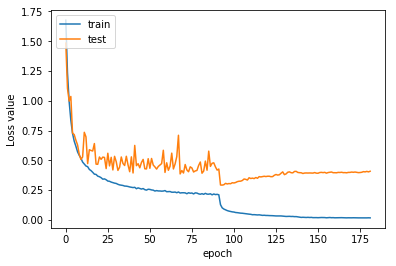

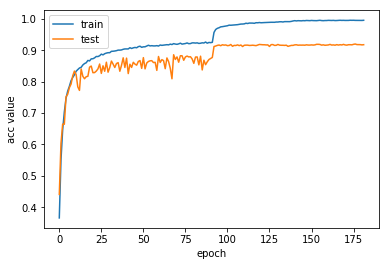

In [4]:
plot_history(history)

# test classifier
test on test data

In [5]:
test_loss, test_acc = solver.test(test_batch_size=128)
print('test_loss:{:.2} test_acc:{:.2%}'.format(test_loss, test_acc))

test_loss:0.41 test_acc:91.78%
